In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [6]:
df = pd.read_csv('dataset.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [20]:
print('shape of the dataset is', df.shape)
print('No of missing values in each column: ')
df.isnull().sum(axis=0)

shape of the dataset is (9134, 24)
No of missing values in each column: 


Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [22]:
# Convert 'Effective to Date' in datetime
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

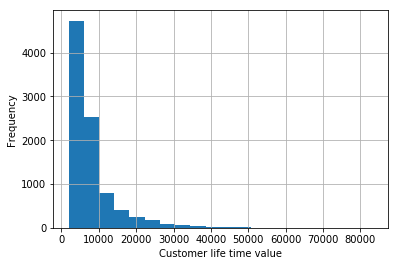

In [41]:
# Some descriptive analysis on the dataset
df['Customer Lifetime Value'].hist(bins = 20)
plt.xlabel('Customer life time value')
plt.ylabel('Frequency')
plt.show()

From the graph it is evident is customer lifetime value is positively skewed with large no of customers of low value and a small no of customers with high customer lifetime value. 

In [50]:
print(df['Customer Lifetime Value'].describe())
print('skewness of customer life time value %s' %df['Customer Lifetime Value'].skew())
print('Kurtosis of customer life time value %s' %df['Customer Lifetime Value'].kurtosis())

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64
skewness of customer life time value 3.032280259929985
Kurtosis of customer life time value 13.823533425442404


These analysis confirm the skewness of the dataset as well. The mean of CLV is 8005$ and standard deviation is around 6871$

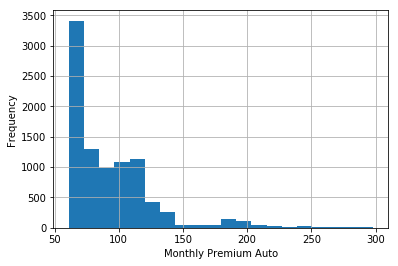

In [52]:
# Plot Monthly Premium Auto as a histogram
df['Monthly Premium Auto'].hist(bins = 20)
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Frequency')
plt.show()

In [53]:
df['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

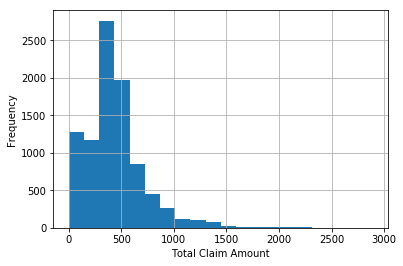

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64


In [54]:
# Plot Total Claim Amount as histogram
df['Total Claim Amount'].hist(bins = 20)
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()
print(df['Total Claim Amount'].describe())

CLV is one the most import factor for business purpose. We will try to model it as well see which factors are important for CLV such that is there any effect of gender or education on CLV

          Customer Lifetime Value  Total Claim Amount
Coverage                                             
Basic                 6142.352363          246.916076
Extended              7427.222824          296.084575
Premium               8370.764826          396.409536


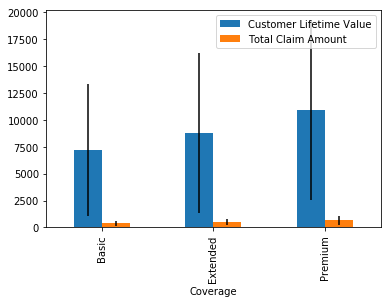

In [71]:
df.groupby('Coverage')['Customer Lifetime Value', 'Total Claim Amount'].mean()
std = df.groupby('Coverage')['Customer Lifetime Value', 'Total Claim Amount'].std()
print(std)
df.groupby('Coverage')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar', yerr= std)

In [88]:
cat1 = df['Customer Lifetime Value'][df['Coverage']=='Basic']
cat2 = df['Customer Lifetime Value'][df['Coverage']=='Extended']
cat3 = df['Customer Lifetime Value'][df['Coverage']=='Premium']
ttest_ind(cat1, cat2, equal_var = False)

Ttest_indResult(statistic=-9.750190315450043, pvalue=3.0071536268149477e-22)

In [91]:
from scipy import stats
# as the distribution of CLV in not normal, let's employ kruskal-walis test that don't assume any specific distribution for the dataset
stats.kruskal(cat1, cat2, cat3)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)

In [96]:
from statsmodels.formula.api import ols
df['CLV'] = df['Customer Lifetime Value']

In [100]:
model_coverage = ols(" CLV ~ Coverage", df).fit()
print(model_coverage.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           6.02e-58
Time:                        12:08:22   Log-Likelihood:                -93528.
No. Observations:                9134   AIC:                         1.871e+05
Df Residuals:                    9131   BIC:                         1.871e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7190.7064 

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.810
Date:                Tue, 07 Aug 2018   Prob (F-statistic):            0.00425
Time:                        12:10:34   Log-Likelihood:                -93652.
No. Observations:                9134   AIC:                         1.873e+05
Df Residuals:                    9129   BIC:                         1.873e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

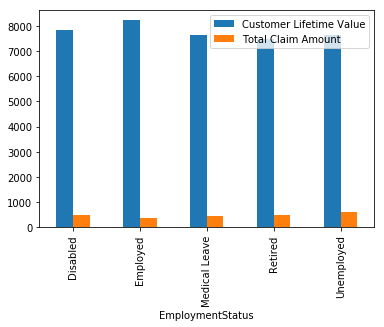

In [102]:
df.groupby('EmploymentStatus')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar')
model_emp_status = ols(" CLV ~ EmploymentStatus ", df).fit()
print(model_emp_status.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.692
Date:                Tue, 07 Aug 2018   Prob (F-statistic):              0.193
Time:                        12:11:28   Log-Likelihood:                -93659.
No. Observations:                9134   AIC:                         1.873e+05
Df Residuals:                    9132   BIC:                         1.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8096.6024    100.670     80.427      

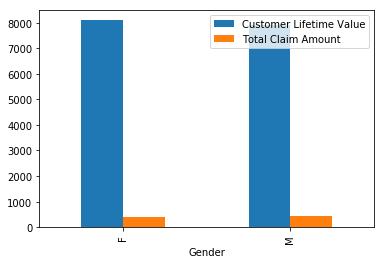

In [103]:
df.groupby('Gender')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar')
model_gender = ols(" CLV ~ Gender ", df).fit()
print(model_gender.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.423
Date:                Tue, 07 Aug 2018   Prob (F-statistic):             0.0460
Time:                        12:13:26   Log-Likelihood:                -93655.
No. Observations:                9134   AIC:                         1.873e+05
Df Residuals:                    9129   BIC:                         1.874e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

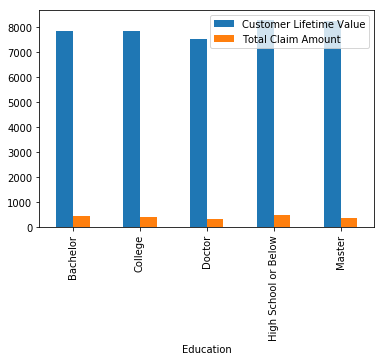

In [104]:
df.groupby('Education')['Customer Lifetime Valgroups = [y[idx == i] for i, l in enumerate(label)]ue', 'Total Claim Amount'].mean().plot(kind = 'bar')
model_education = ols(" CLV ~ Education ", df).fit()
print(model_education.summary()) 

In [109]:
import numpy as np
label, idx = np.unique(df['Education'], return_inverse=True)
groups = [df['CLV'][idx == i] for i, l in enumerate(label)]
stats.kruskal(*groups)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)

In [110]:
import numpy as np
label, idx = np.unique(df['Marital Status'], return_inverse=True)
groups = [df['CLV'][idx == i] for i, l in enumerate(label)]
stats.kruskal(*groups)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)

In [111]:
label, idx = np.unique(df['Location Code'], return_inverse=True)
groups = [df['CLV'][idx == i] for i, l in enumerate(label)]
stats.kruskal(*groups)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)

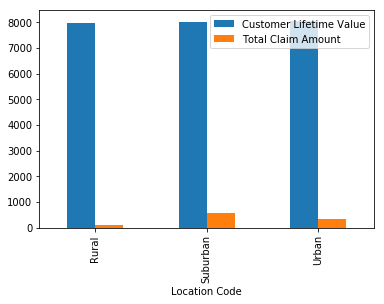

In [112]:
df.groupby('Location Code')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar')

KruskalResult(statistic=5.07206958384011, pvalue=0.2799823235878242)

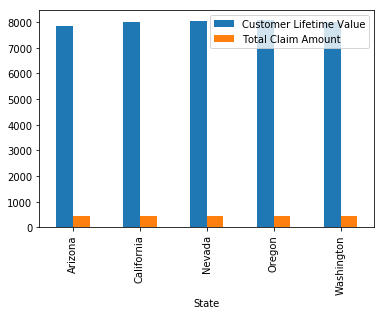

In [114]:
df.groupby('State')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar')
label, idx = np.unique(df['State'], return_inverse=True)
groups = [df['CLV'][idx == i] for i, l in enumerate(label)]
stats.kruskal(*groups)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)

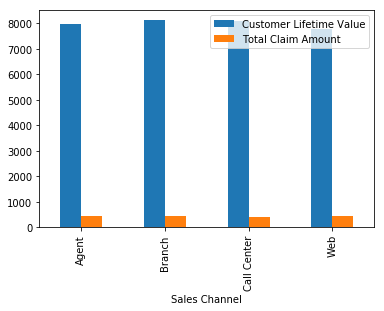

In [115]:
df.groupby('Sales Channel')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar')
label, idx = np.unique(df['Sales Channel'], return_inverse=True)
groups = [df['CLV'][idx == i] for i, l in enumerate(label)]
stats.kruskal(*groups)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)

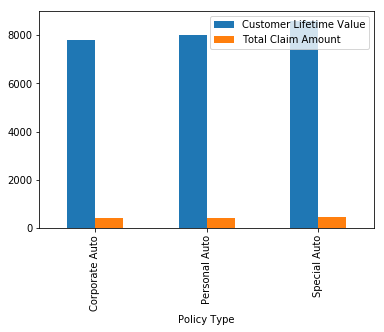

In [155]:
df.groupby('Policy Type')['Customer Lifetime Value', 'Total Claim Amount'].mean().plot(kind = 'bar')
label, idx = np.unique(df['Policy Type'], return_inverse=True)
groups = [df['CLV'][idx == i] for i, l in enumerate(label)]
stats.kruskal(*groups)

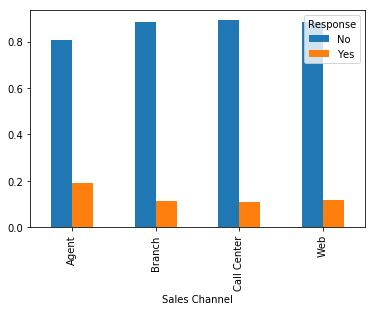

In [153]:
temp = df.groupby(['Sales Channel', 'Response'])['Response'].count()/df.groupby(['Sales Channel'])['Response'].count()
temp.unstack(level=1).plot(kind = 'bar')

In [182]:
print(df.groupby(['State', 'Policy Type'])['Number of Policies']temp = df.groupby(['Sales Channel', 'Response'])['Response'].count().sum() / df.groupby('State')['Number of Policies'].sum())
print(df.groupby('Policy Type')['Number of Policies'].sum() / df['Number of Policies'].sum())

State       Policy Type   
Arizona     Corporate Auto    0.198890
            Personal Auto     0.757466
            Special Auto      0.043645
California  Corporate Auto    0.232563
            Personal Auto     0.731493
            Special Auto      0.035944
Nevada      Corporate Auto    0.211923
            Personal Auto     0.748877
            Special Auto      0.039200
Oregon      Corporate Auto    0.213058
            Personal Auto     0.741176
            Special Auto      0.045766
Washington  Corporate Auto    0.210954
            Personal Auto     0.757381
            Special Auto      0.031665
Name: Number of Policies, dtype: float64
Policy Type
Corporate Auto    0.216772
Personal Auto     0.743070
Special Auto      0.040158
Name: Number of Policies, dtype: float64


In [190]:
temp = df.groupby(['State', 'Sales Channel'])['CLV'].median()
df.groupby('Sales Channel')['Customer Lifetime Value', 'Total Claim Amount', 'Monthly Premium Auto'].mean()

,Customer Lifetime Value,Total Claim Amount,Monthly Premium Auto
Sales Channel,,,
Agent,7957.709353,438.434673,93.679034
Branch,8119.711861,432.866800,93.306973
Call Center,8100.085753,428.124624,92.482153
Web,7779.788057,432.996719,92.824906
